In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys
os.chdir('..')
sys.path.append('src')
os.environ["CUDA_VISIBLE_DEVICES"]="2"

In [3]:
from pathlib import Path

import postprocessing

In [4]:
import torch
torch.cuda.current_device() 

0

In [5]:
src_folder = '/mnt/storage/HuBMAP/test'
img_name = next(Path(src_folder).glob('*.tiff'))
print(img_name)

/mnt/storage/HuBMAP/test/b9a3865fc.tiff


In [6]:
import infer

In [7]:
# p = 'output/2021_Feb_10_19_55_56_PAMBUH/'
p = 'output/2021_Feb_12_20_08_44_PAMBUH/'
foo = infer.get_infer_func(p)

In [8]:
mask = postprocessing.read_and_process_img(img_name, foo, block_size=2048, crop_size=2000)
mask.shape

31295 40429


/usr/local/lib/python3.6/dist-packages/rasterio/__init__.py:207: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix be returned.
  s = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


rows:   0%|          | 0/16 [00:00<?, ?it/s]

columns:   0%|          | 0/21 [00:00<?, ?it/s]

columns:   0%|          | 0/21 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [13]:
mask.max()

tensor(1., device='cuda:0')

In [16]:
mask01 = np.uint8(float_mask2_01uint8(mask).to('cpu'))

In [26]:
np.unique(mask01)

array([0, 1], dtype=uint8)

In [27]:
import numpy as np
from postprocessing import float_mask2_01uint8 ,save_tiff_uint8_single_band
from rle2tiff import mask2rle, rle2mask

In [39]:
ll = mask2rle(mask01.T)

In [46]:
rr = rle2mask(ll, (31295, 40429))

In [47]:
rr.dtype

dtype('uint8')

(31295, 40429)


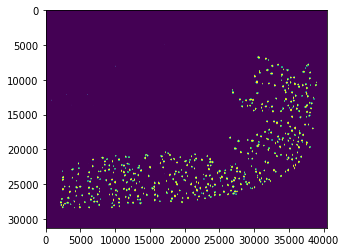

In [48]:
postprocessing._plot_img(rr)

In [ ]:
mask01 = np.uint8(float_mask2_01uint8(mask).to('cpu'))
save_tiff_uint8_single_band(mask01, dst_folder / img_name.name)
# spamwriter.writerow([img_name.stem, mask2rle(mask01)])


(31295, 40429)


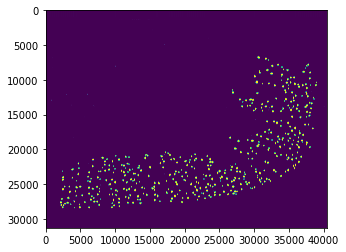

In [8]:
postprocessing._plot_img(mask.to('cpu').numpy())

In [10]:
postprocessing.postprocess_test_folder(foo, src_folder, './output')

Test images: 0it [00:00, ?it/s]

31295 40429


rows:   0%|          | 0/16 [00:00<?, ?it/s]

columns:   0%|          | 0/21 [00:00<?, ?it/s]

columns:   0%|          | 0/21 [00:00<?, ?it/s]

columns:   0%|          | 0/21 [00:00<?, ?it/s]

columns:   0%|          | 0/21 [00:00<?, ?it/s]

columns:   0%|          | 0/21 [00:00<?, ?it/s]

columns:   0%|          | 0/21 [00:00<?, ?it/s]

columns:   0%|          | 0/21 [00:00<?, ?it/s]

columns:   0%|          | 0/21 [00:00<?, ?it/s]

columns:   0%|          | 0/21 [00:00<?, ?it/s]

columns:   0%|          | 0/21 [00:00<?, ?it/s]

columns:   0%|          | 0/21 [00:00<?, ?it/s]

columns:   0%|          | 0/21 [00:00<?, ?it/s]

columns:   0%|          | 0/21 [00:00<?, ?it/s]

columns:   0%|          | 0/21 [00:00<?, ?it/s]

columns:   0%|          | 0/21 [00:00<?, ?it/s]

columns:   0%|          | 0/21 [00:00<?, ?it/s]

38160 42360


rows:   0%|          | 0/20 [00:00<?, ?it/s]

columns:   0%|          | 0/22 [00:00<?, ?it/s]

columns:   0%|          | 0/22 [00:00<?, ?it/s]

columns:   0%|          | 0/22 [00:00<?, ?it/s]

columns:   0%|          | 0/22 [00:00<?, ?it/s]

columns:   0%|          | 0/22 [00:00<?, ?it/s]

columns:   0%|          | 0/22 [00:00<?, ?it/s]

columns:   0%|          | 0/22 [00:00<?, ?it/s]

columns:   0%|          | 0/22 [00:00<?, ?it/s]

columns:   0%|          | 0/22 [00:00<?, ?it/s]

columns:   0%|          | 0/22 [00:00<?, ?it/s]

columns:   0%|          | 0/22 [00:00<?, ?it/s]

columns:   0%|          | 0/22 [00:00<?, ?it/s]

columns:   0%|          | 0/22 [00:00<?, ?it/s]

columns:   0%|          | 0/22 [00:00<?, ?it/s]

columns:   0%|          | 0/22 [00:00<?, ?it/s]

columns:   0%|          | 0/22 [00:00<?, ?it/s]

columns:   0%|          | 0/22 [00:00<?, ?it/s]

columns:   0%|          | 0/22 [00:00<?, ?it/s]

columns:   0%|          | 0/22 [00:00<?, ?it/s]

columns:   0%|          | 0/22 [00:00<?, ?it/s]

14844 31262


rows:   0%|          | 0/8 [00:00<?, ?it/s]

columns:   0%|          | 0/16 [00:00<?, ?it/s]

columns:   0%|          | 0/16 [00:00<?, ?it/s]

columns:   0%|          | 0/16 [00:00<?, ?it/s]

columns:   0%|          | 0/16 [00:00<?, ?it/s]

columns:   0%|          | 0/16 [00:00<?, ?it/s]

columns:   0%|          | 0/16 [00:00<?, ?it/s]

columns:   0%|          | 0/16 [00:00<?, ?it/s]

columns:   0%|          | 0/16 [00:00<?, ?it/s]

36800 43780


rows:   0%|          | 0/19 [00:00<?, ?it/s]

columns:   0%|          | 0/22 [00:00<?, ?it/s]

columns:   0%|          | 0/22 [00:00<?, ?it/s]

columns:   0%|          | 0/22 [00:00<?, ?it/s]

columns:   0%|          | 0/22 [00:00<?, ?it/s]

columns:   0%|          | 0/22 [00:00<?, ?it/s]

columns:   0%|          | 0/22 [00:00<?, ?it/s]

columns:   0%|          | 0/22 [00:00<?, ?it/s]

columns:   0%|          | 0/22 [00:00<?, ?it/s]

columns:   0%|          | 0/22 [00:00<?, ?it/s]

columns:   0%|          | 0/22 [00:00<?, ?it/s]

columns:   0%|          | 0/22 [00:00<?, ?it/s]

columns:   0%|          | 0/22 [00:00<?, ?it/s]

columns:   0%|          | 0/22 [00:00<?, ?it/s]

columns:   0%|          | 0/22 [00:00<?, ?it/s]

columns:   0%|          | 0/22 [00:00<?, ?it/s]

columns:   0%|          | 0/22 [00:00<?, ?it/s]

columns:   0%|          | 0/22 [00:00<?, ?it/s]

columns:   0%|          | 0/22 [00:00<?, ?it/s]

columns:   0%|          | 0/22 [00:00<?, ?it/s]

26840 49780


rows:   0%|          | 0/14 [00:00<?, ?it/s]

columns:   0%|          | 0/25 [00:00<?, ?it/s]

columns:   0%|          | 0/25 [00:00<?, ?it/s]

columns:   0%|          | 0/25 [00:00<?, ?it/s]

columns:   0%|          | 0/25 [00:00<?, ?it/s]

columns:   0%|          | 0/25 [00:00<?, ?it/s]

columns:   0%|          | 0/25 [00:00<?, ?it/s]

columns:   0%|          | 0/25 [00:00<?, ?it/s]

columns:   0%|          | 0/25 [00:00<?, ?it/s]

columns:   0%|          | 0/25 [00:00<?, ?it/s]

columns:   0%|          | 0/25 [00:00<?, ?it/s]

columns:   0%|          | 0/25 [00:00<?, ?it/s]

columns:   0%|          | 0/25 [00:00<?, ?it/s]

columns:   0%|          | 0/25 [00:00<?, ?it/s]

columns:   0%|          | 0/25 [00:00<?, ?it/s]

NameError: name 'sample_submission' is not defined